<a href="https://colab.research.google.com/github/emmaezeumeh/ieakpoveta/blob/main/Drug%20_Development_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bokeh.io
import bokeh.plotting
import bokeh.layouts

bokeh.io.output_notebook()

# from bokeh.io import output_notebook
# output_notebook()

# from bokeh.layouts import row
# from bokeh.plotting import figure, show

LOADING AND DISPLAYING THE DATASETS

In [2]:
# Loading the datasets
project_data = pd.read_csv('/content/Project_Level_Data - Project_Level_Data.csv')
gene_drug_data = pd.read_csv('/content/Gene_Drug_Adverse_Event_Relationships - Gene_Drug_Adverse_Event_Relationships.csv')
compound_activity_data = pd.read_csv('/content/Compound_Off_Target_Activity - Compound_Off_Target_Activity.csv')


# Displaying the first few rows of each dataset to understand their structure
print("Project Level Data:")
print(project_data.head())
print("\nGene Drug Adverse Event Relationships:")
print(gene_drug_data.head())
print("\nCompound Off Target Activity:")
print(compound_activity_data.head())


Project Level Data:
   CompoundID Primary_Target_Assay  Primary_Target_Assay_BioActivity      MW  \
0  CM-1622017        JAK1 EC50(uM)                             0.259  389.45   
1  CM-1749952        JAK1 EC50(uM)                             0.312  461.99   
2  CM-1749952        JAK1 EC50(uM)                             0.312  461.99   
3  CM-1749702        JAK1 EC50(uM)                             3.000  386.49   
4  CM-1749701        JAK1 EC50(uM)                             3.000  385.51   

   Molecular_Weight   TPSA  ClogP    LogD  Num_H_Donors  Num_H_Acceptors  \
0               NaN  79.59  3.586  3.5863             1                7   
1               NaN  89.36  2.132  1.3643             2                9   
2               NaN  89.36  2.132  1.3643             2                9   
3               NaN  97.12  1.995  1.9948             3                8   
4               NaN  80.13  2.524  1.7222             2                8   

   Num_AromaticRings    F_SP3 Drug_Class  

# DATA HARMONIZATION

In [3]:
# Rename 'Gene Target' to 'GeneSymbol' in the compound_off_target_activity for consistency in merging
compound_activity_data.rename(columns={'Gene Target': 'GeneSymbol'}, inplace=True)

# Merge compound_off_target_activity with project_level_data on CompoundID
merged_data = pd.merge(compound_activity_data, project_data, on='CompoundID', how='inner')

# Merge the above result with gene_drug_adverse_event_relationships on Gene
final_merged_data = pd.merge(merged_data, gene_drug_data, on='GeneSymbol', how='inner')

# Display the first few rows of the final merged data to check the result
final_merged_data.head()



,CompoundID,GeneSymbol,pIC50,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,...,"Clint,mic (L/hr/kg) (Rat)",Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Hepatic lesion,11,3175,4905,2381,74,102
1,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Thrombotic microangiopathy,11,3175,4905,2381,155,102
2,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Full blood count decreased,11,3175,4905,2381,97,102
3,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Gingival pain,11,3175,4905,2381,77,102
4,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Myoclonus,11,3175,4905,2381,268,102


In [ ]:
final_merged_data.shape()

# DATA CLEANING AND PREPROCESSING


In [4]:
# Checking for missing values in the dataset
print("\nMissing values in the Merged Dataset:")
print(final_merged_data.isnull().sum())



Missing values in the Merged Dataset:
CompoundID                                0
GeneSymbol                                0
pIC50                                     0
Primary_Target_Assay                      0
Primary_Target_Assay_BioActivity          0
MW                                  5582620
Molecular_Weight                     862074
TPSA                                      0
ClogP                                     0
LogD                                   9569
Num_H_Donors                              0
Num_H_Acceptors                           0
Num_AromaticRings                         0
F_SP3                                     0
Drug_Class                           644545
Cell Permeability                    918453
Cmpd Solubility (uM)                 972150
fafg (Rat)                          6170327
Bioavailability (Rat)               5820050
Clint,mic (L/hr/kg) (Rat)           1337445
Ensembl ID                          1983715
EntrezGene                          2

In [5]:
# Handling missing values

# For GeneSymbol and EntrezGene, we can drop rows with missing values
final_merged_data = final_merged_data.dropna(subset=['GeneSymbol', 'EntrezGene', 'Ensembl ID'])


# Merging 'MW' and 'Molecular_Weight' into one column 'Molecular_Weight'
final_merged_data['Molecular_Weight'] = final_merged_data['Molecular_Weight'].combine_first(final_merged_data['MW'])

# Dropping the redundant columns
final_merged_data = final_merged_data.drop(columns=['MW', 'Primary_Target_Assay'])

# Dropping columns with excessive missing values (arbitrary threshold: more than 50% missing)
threshold = len(final_merged_data.columns) * 0.5
final_merged_data = final_merged_data.dropna(thresh=threshold)

# For the remaining missing values, use mean/mode imputation based on the column type
# Numerical columns: Primary_Target_Assay_BioActivity, LogD, Clint,mic (L/hr/kg) (Rat),  Cell Permeability, Cmpd Solubility (uM), Num_AromaticRings, F_SP3, fafg (Rat), Bioavailability (Rat)
# Categorical columns: Drug_Class

# Mean imputation for numerical columns
for col in ['Primary_Target_Assay_BioActivity', 'LogD', 'Num_AromaticRings', 'F_SP3', 'Cell Permeability', 'Cmpd Solubility (uM)', 'fafg (Rat)', 'Bioavailability (Rat)', 'Clint,mic (L/hr/kg) (Rat)']:
    final_merged_data[col].fillna(final_merged_data[col].mean(), inplace=True)

# Mode imputation for categorical columns
for col in ['Drug_Class']:
   final_merged_data[col].fillna(final_merged_data[col].mode()[0], inplace=True)

# Removing the columns that offer no information
cleaned_merged_data = final_merged_data.drop(columns=['ae_count', 'gene_count', 'drug_count', 'thresholdset'])




In [6]:
# Verify the no missing values
print("\nMissing values in Merged Dataset:")
print(cleaned_merged_data.isnull().sum())




Missing values in Merged Dataset:
CompoundID                          0
GeneSymbol                          0
pIC50                               0
Primary_Target_Assay_BioActivity    0
Molecular_Weight                    0
TPSA                                0
ClogP                               0
LogD                                0
Num_H_Donors                        0
Num_H_Acceptors                     0
Num_AromaticRings                   0
F_SP3                               0
Drug_Class                          0
Cell Permeability                   0
Cmpd Solubility (uM)                0
fafg (Rat)                          0
Bioavailability (Rat)               0
Clint,mic (L/hr/kg) (Rat)           0
Ensembl ID                          0
EntrezGene                          0
ae                                  0
drugs_with_ae                       0
bioactive_drugs                     0
dtype: int64


In [7]:
 # Standardizing column names for consistency

cleaned_merged_data.rename(columns={
    'GeneSymbol': 'Gene_Symbol', 'EntrezGene': 'Entrez_Gene',
    'ae': 'Adverse_Events', 'Ensembl ID': 'Ensembl_ID',
    'Primary_Target_Assay_BioActivity': 'Primary_BioActivity',
    'Num_H_Donors': 'Num_Hydrogen_Donors',
    'Num_H_Acceptors': 'Num_Hydrogen_Acceptors',
    'Num_AromaticRings': 'Num_Aromatic_Rings',
    'F_SP3': 'Fraction_SP3',
    'Cell Permeability': 'Cell_Permeability',
    'Cmpd Solubility (uM)': 'Compound_Solubility_uM',
    'fafg (Rat)': 'Fafg_Rat',
    'Gene Target': 'Gene_Target',
    'Bioavailability (Rat)': 'Bioavailability_Rat',
    'Clint,mic (L/hr/kg) (Rat)': 'Clint_Rat_L_hr_kg'
}, inplace=True)

cleaned_merged_data.columns = cleaned_merged_data.columns.str.lower()


# Checking the updated column names
print("\nColumn Names in Merged Dataset:")
print(cleaned_merged_data.columns)




Column Names in Merged Dataset:
Index(['compoundid', 'gene_symbol', 'pic50', 'primary_bioactivity',
       'molecular_weight', 'tpsa', 'clogp', 'logd', 'num_hydrogen_donors',
       'num_hydrogen_acceptors', 'num_aromatic_rings', 'fraction_sp3',
       'drug_class', 'cell_permeability', 'compound_solubility_um', 'fafg_rat',
       'bioavailability_rat', 'clint_rat_l_hr_kg', 'ensembl_id', 'entrez_gene',
       'adverse_events', 'drugs_with_ae', 'bioactive_drugs'],
      dtype='object')


**Transformation of Variables**

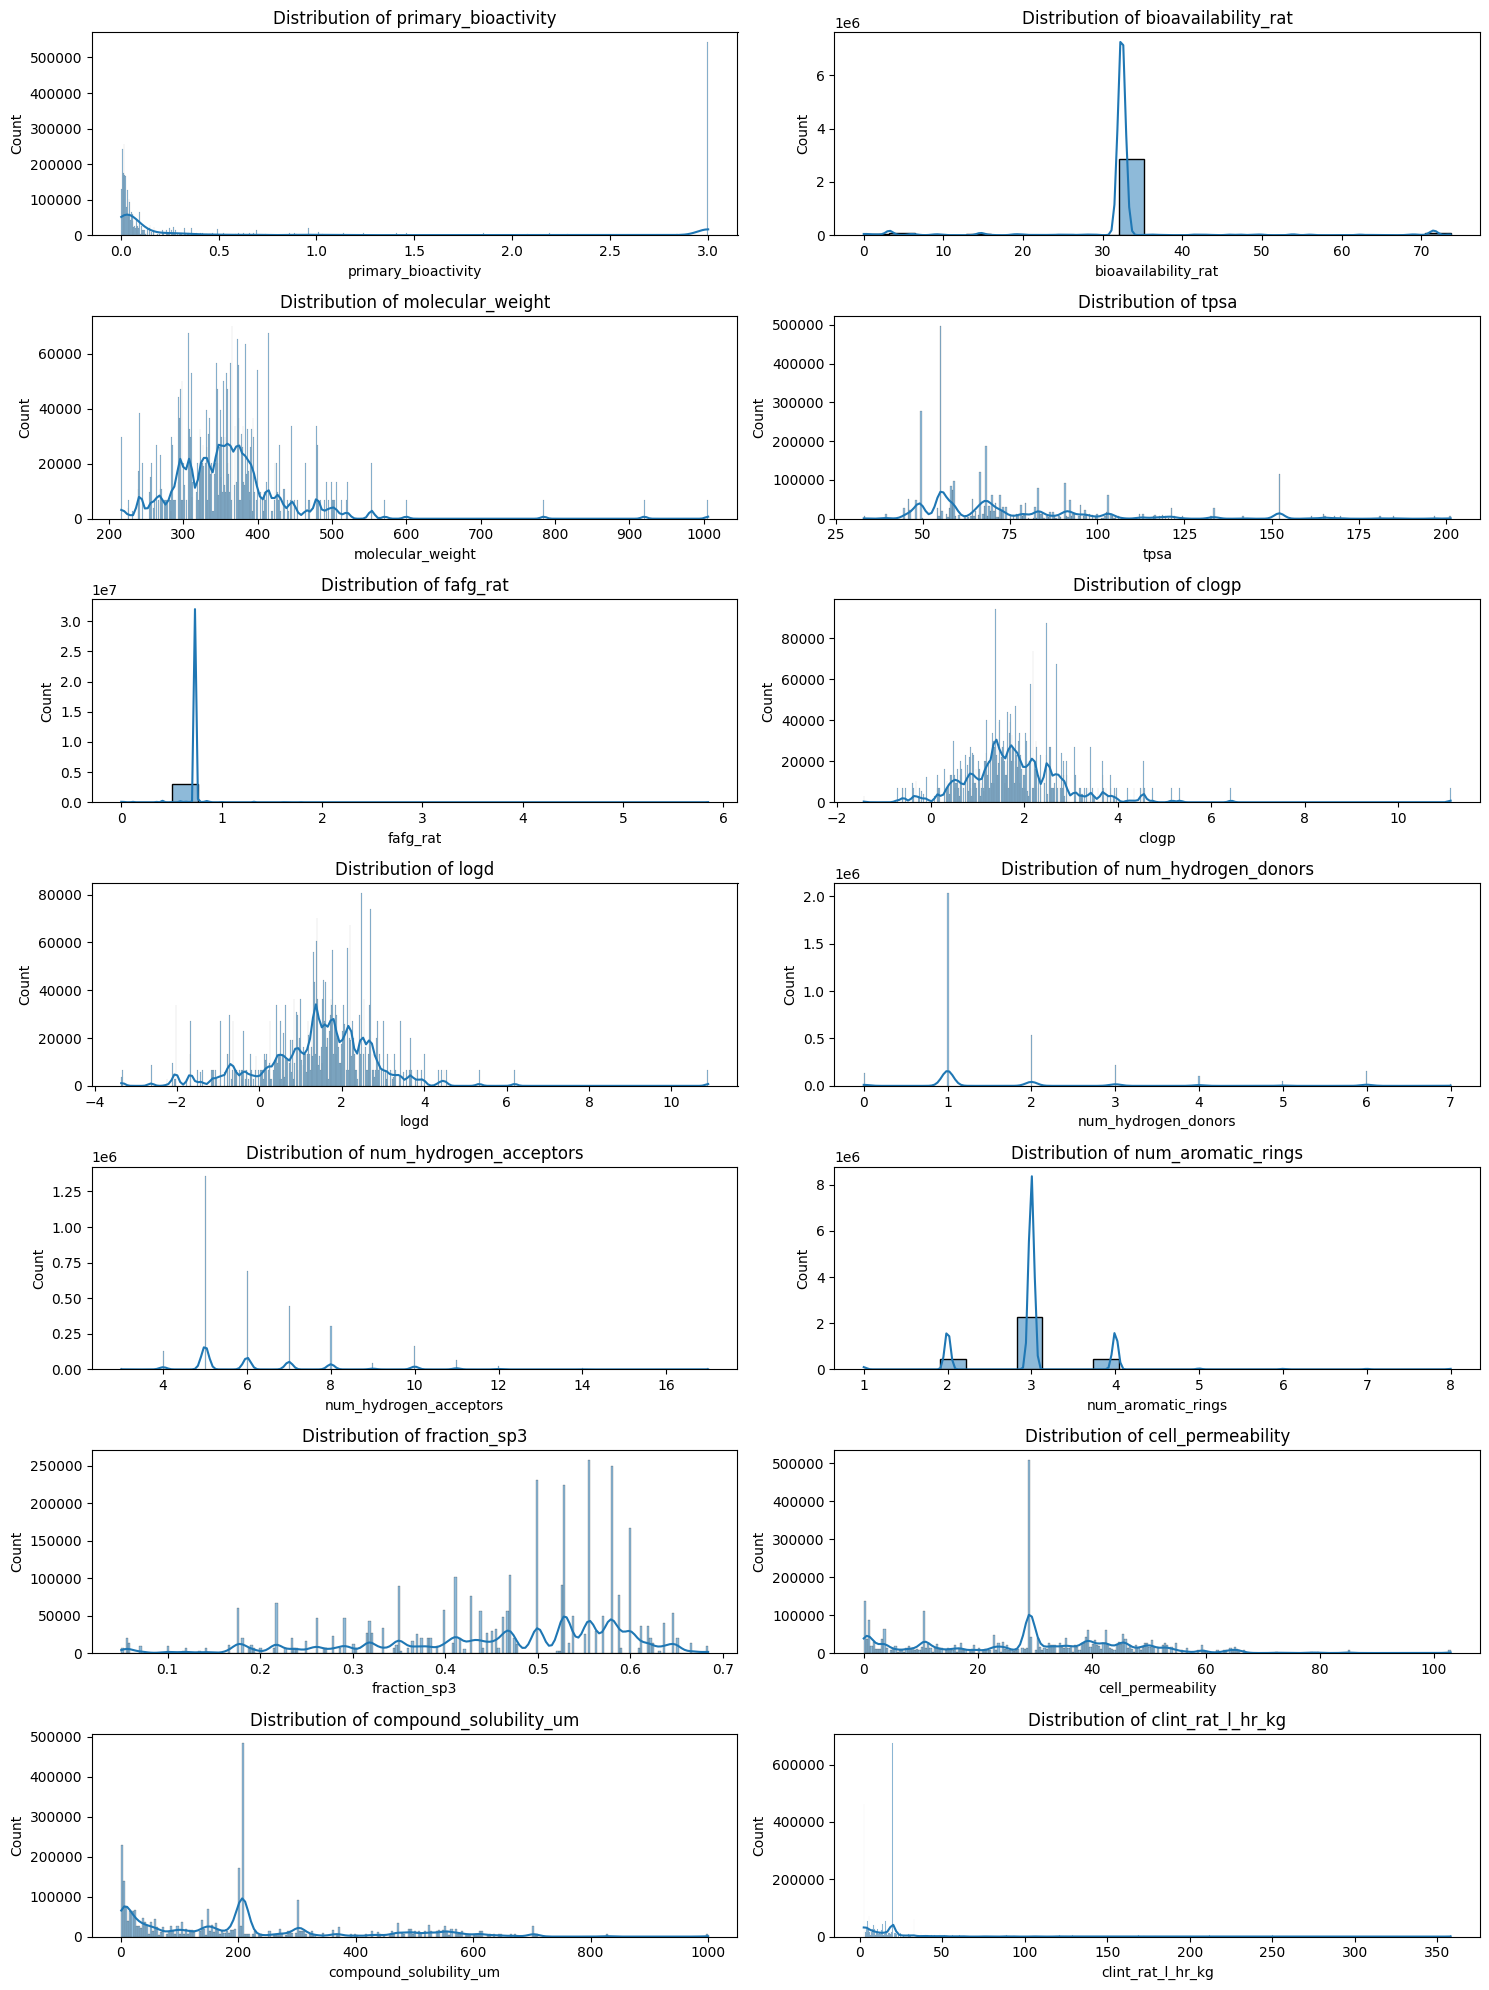

In [8]:
# List of numerical columns to check for transformations
numerical_columns = [
    'primary_bioactivity', 'bioavailability_rat', 'molecular_weight',
    'tpsa', 'fafg_rat', 'clogp', 'logd', 'num_hydrogen_donors',
    'num_hydrogen_acceptors', 'num_aromatic_rings', 'fraction_sp3',
    'cell_permeability', 'compound_solubility_um', 'clint_rat_l_hr_kg'
]

plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 2, i)
    sns.histplot(cleaned_merged_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



**Observations from Distributions**

**Skewed Distributions**: Many of the numerical variables, such as  primary_bioactivity, molecular_weight, bioavailability_rat, fafg_rat, tpsa, logd, cell_permeability, cmpd_solubility_(um), and clint,mic_(l/hr/kg)_(rat), appear to have skewed distributions.

**Candidates for Log Transformation**: These variables may benefit from log transformations to normalize the distribution.

Applying log transformation will help improve robust analysis and modeling.

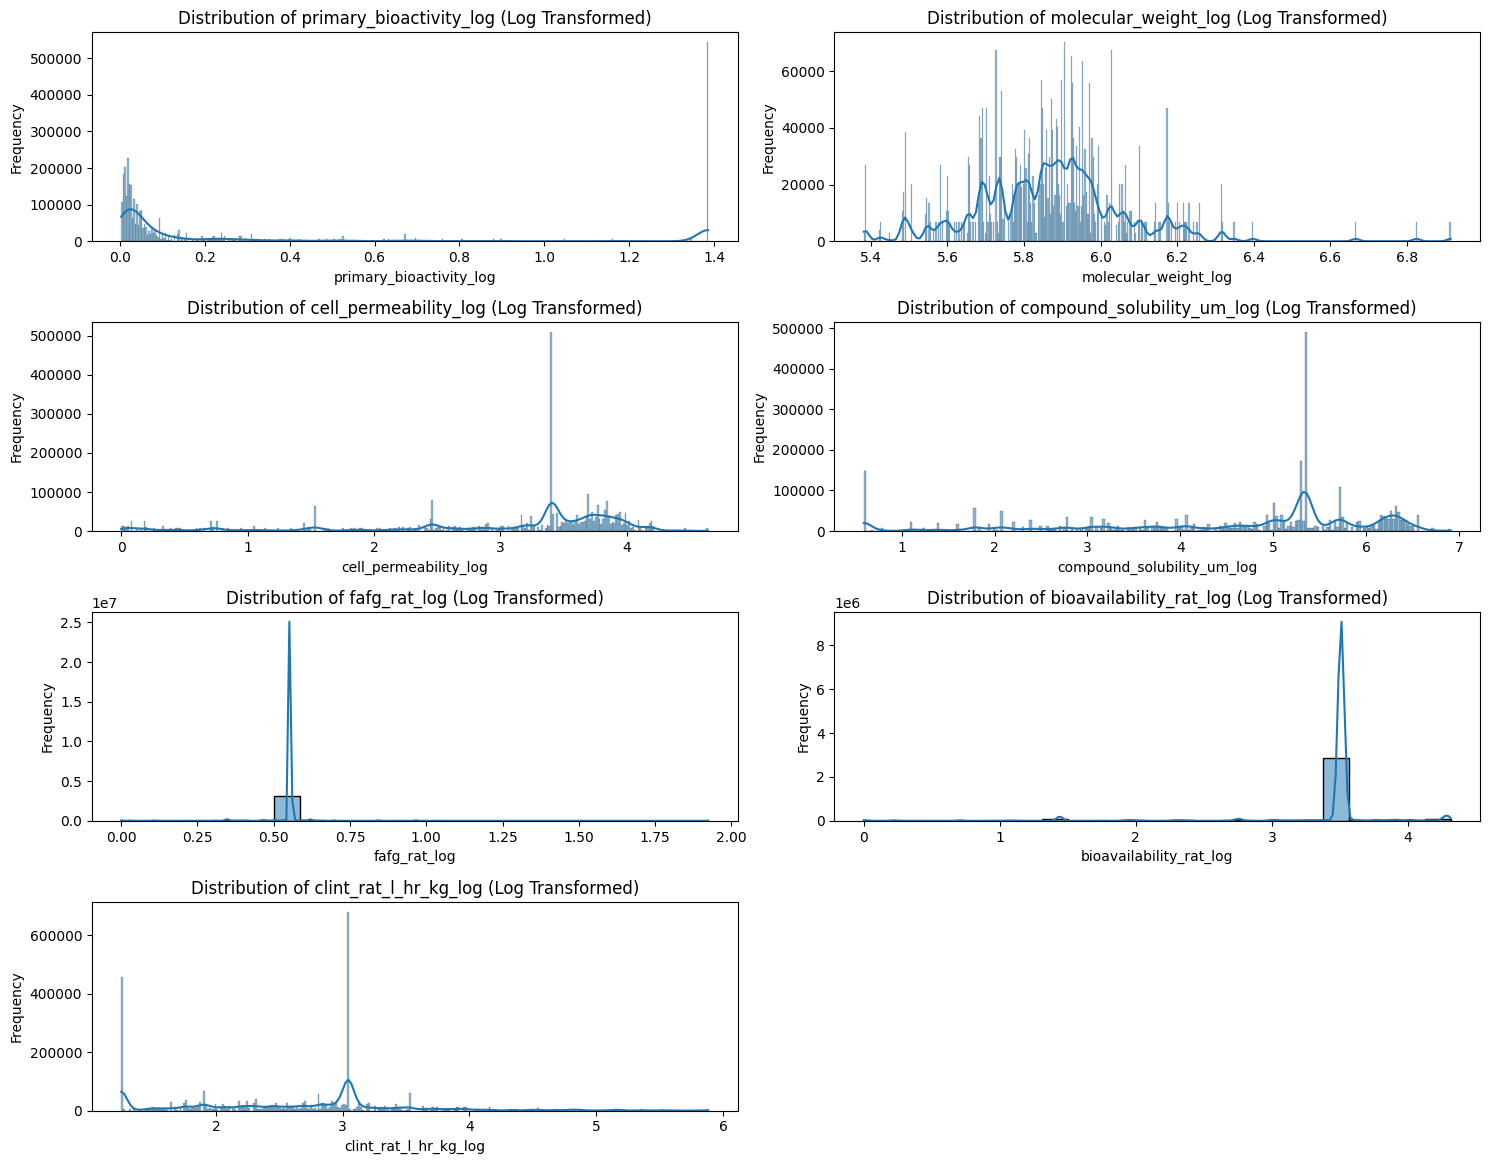

In [9]:
# Applying Log Transformation to the identified skewed variables to normalize their distributions.

cleaned_merged_data['primary_bioactivity_log'] = np.log1p(cleaned_merged_data['primary_bioactivity'])
cleaned_merged_data['cell_permeability_log'] = np.log1p(cleaned_merged_data['cell_permeability'])
cleaned_merged_data['compound_solubility_um_log'] = np.log1p(cleaned_merged_data['compound_solubility_um'])
cleaned_merged_data['fafg_rat_log'] = np.log1p(cleaned_merged_data['fafg_rat'])
cleaned_merged_data['bioavailability_rat_log'] = np.log1p(cleaned_merged_data['bioavailability_rat'])
cleaned_merged_data['clint_rat_l_hr_kg_log'] = np.log1p(cleaned_merged_data['clint_rat_l_hr_kg'])
cleaned_merged_data['molecular_weight_log'] = np.log1p(cleaned_merged_data['molecular_weight'])


# Verifying the transformation
transformed_columns = [
    'primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log', 'clint_rat_l_hr_kg_log'
]

plt.figure(figsize=(15, 20))
for i, column in enumerate(transformed_columns, 1):
    plt.subplot(7, 2, i)
    sns.histplot(cleaned_merged_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} (Log Transformed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [10]:
# Dropping the redundant columns
cleaned_merged_data = cleaned_merged_data.drop(columns=['primary_bioactivity',
    'cell_permeability', 'compound_solubility_um', 'fafg_rat',
    'bioavailability_rat', 'clint_rat_l_hr_kg', 'molecular_weight'])

In [11]:
print("\nColumn Names in Dataset:")
print(cleaned_merged_data.columns)


Column Names in Dataset:
Index(['compoundid', 'gene_symbol', 'pic50', 'tpsa', 'clogp', 'logd',
       'num_hydrogen_donors', 'num_hydrogen_acceptors', 'num_aromatic_rings',
       'fraction_sp3', 'drug_class', 'ensembl_id', 'entrez_gene',
       'adverse_events', 'drugs_with_ae', 'bioactive_drugs',
       'primary_bioactivity_log', 'cell_permeability_log',
       'compound_solubility_um_log', 'fafg_rat_log', 'bioavailability_rat_log',
       'clint_rat_l_hr_kg_log', 'molecular_weight_log'],
      dtype='object')


**Creating and Encoding Adverse Event Categories in the Gene Drug Adverse Event Relationship Dataset**

In [12]:

# Define the categories and associated keywords
categories = {
    "Cardiovascular": ["chest", "heart", "cardiac", "hypertension", "blood pressure", "tachycardia", "bradycardia"],
    "Gastrointestinal": ["stomach", "abdominal", "vomit", "nausea", "diarrhea", "constipation", "gastro"],
    "Neurological": ["headache", "migraine", "dizziness", "seizure", "neuropathy", "tremor", "neurological"],
    "Dermatological": ["rash", "skin", "dermatitis", "eczema", "psoriasis", "dermato"],
    "Haematological": ["anemia", "leukopenia", "thrombocytopenia", "blood", "haemato", "haemo", "hemo"],
    "Renal": ["kidney", "renal", "nephro"],
    "Respiratory": ["lung", "asthma", "respiratory", "bronchitis"],
    "Musculoskeletal": ["muscle", "bone", "arthritis", "myalgia", "osteoporosis", "musculoskeletal"],
    "Endocrine": ["diabetes", "thyroid", "endocrine", "hormone"],
    "Hepatology": ["liver", "hepato"],
    "General": ["pain", "fatigue", "fever", "weakness", "general"],
    "Urology": ["urine", "urinary", "urology", "bladder"],
    "Reproductive": ["pregnancy", "fertility", "reproductive"],
    "Immunological": ["allergy", "immune", "cytokine", "hypersensitivity"],
    "Psychological": ["anxiety", "depression", "suicidial", "ptsd", "bipolar", "psycho", "mood", "sleep", "insomnia", "food"]
}

# Function to map adverse events to categories
def map_adverse_event_to_category(adverse_event, categories):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in adverse_event.lower():
                return category
    return "Other"  # Return "Other" if no category matches

# Apply the mapping function to the adverse event column
cleaned_merged_data['adverse_events_category'] = cleaned_merged_data['adverse_events'].apply(lambda x: map_adverse_event_to_category(x, categories))


# Display the first few rows of the updated dataframe
print(cleaned_merged_data.head())



        compoundid gene_symbol  pic50   tpsa  clogp    logd  \
1492848  CM-212452        EGFR   5.35  93.35  2.482  2.4436   
1492849  CM-212452        EGFR   5.35  93.35  2.482  2.4436   
1492850  CM-212452        EGFR   5.35  93.35  2.482  2.4436   
1492851  CM-212452        EGFR   5.35  93.35  2.482  2.4436   
1492852  CM-212452        EGFR   5.35  93.35  2.482  2.4436   

         num_hydrogen_donors  num_hydrogen_acceptors  num_aromatic_rings  \
1492848                    3                       5                 2.0   
1492849                    3                       5                 2.0   
1492850                    3                       5                 2.0   
1492851                    3                       5                 2.0   
1492852                    3                       5                 2.0   

         fraction_sp3  ... drugs_with_ae bioactive_drugs  \
1492848       0.05882  ...           151              21   
1492849       0.05882  ...          1991    

In [13]:
# Encoding categorical data
cleaned_merged_data["adverse_events_category_encoded"] = cleaned_merged_data["adverse_events_category"].astype('category').cat.codes
cleaned_merged_data.head()



,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,primary_bioactivity_log,cell_permeability_log,compound_solubility_um_log,fafg_rat_log,bioavailability_rat_log,clint_rat_l_hr_kg_log,molecular_weight_log,adverse_events_category,adverse_events_category_encoded
1492848,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,1.386294,3.405307,5.348926,0.553091,3.508453,3.045285,5.687992,Haematological,5
1492849,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,1.386294,3.405307,5.348926,0.553091,3.508453,3.045285,5.687992,Gastrointestinal,3
1492850,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,151,1.386294,3.405307,5.348926,0.553091,3.508453,3.045285,5.687992,Gastrointestinal,3
1492851,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,1.386294,3.405307,5.348926,0.553091,3.508453,3.045285,5.687992,Other,10
1492852,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,8,1.386294,3.405307,5.348926,0.553091,3.508453,3.045285,5.687992,Psychological,11


In [14]:
#  Checking for duplicated values
duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')



Duplicates Rows in Dataset are : 320480


In [15]:
# Identifying duplicates in the dataset

duplicated = cleaned_merged_data[cleaned_merged_data.duplicated(keep=False)]
cleaned_merged_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_merged_data.shape[0], cleaned_merged_data.shape[1]))
duplicated.head()

Total 2930016 datapoints remaining with 25 features


,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,primary_bioactivity_log,cell_permeability_log,compound_solubility_um_log,fafg_rat_log,bioavailability_rat_log,clint_rat_l_hr_kg_log,molecular_weight_log,adverse_events_category,adverse_events_category_encoded
1527840,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,0.239804,4.099332,5.303305,0.553091,3.508453,1.877937,5.490135,Haematological,5
1527841,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,0.239804,4.099332,5.303305,0.553091,3.508453,1.877937,5.490135,Gastrointestinal,3
1527842,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,151,0.239804,4.099332,5.303305,0.553091,3.508453,1.877937,5.490135,Gastrointestinal,3
1527843,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,0.239804,4.099332,5.303305,0.553091,3.508453,1.877937,5.490135,Other,10
1527844,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,8,0.239804,4.099332,5.303305,0.553091,3.508453,1.877937,5.490135,Psychological,11


In [19]:
# Confirming there are no longer duplicated values

duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')



Dataset contains no Duplicate Values


In [16]:
print("\nColumn Names in the Merged Dataset:")
print(cleaned_merged_data.columns)


Column Names in the Merged Dataset:
Index(['compoundid', 'gene_symbol', 'pic50', 'tpsa', 'clogp', 'logd',
       'num_hydrogen_donors', 'num_hydrogen_acceptors', 'num_aromatic_rings',
       'fraction_sp3', 'drug_class', 'ensembl_id', 'entrez_gene',
       'adverse_events', 'drugs_with_ae', 'bioactive_drugs',
       'primary_bioactivity_log', 'cell_permeability_log',
       'compound_solubility_um_log', 'fafg_rat_log', 'bioavailability_rat_log',
       'clint_rat_l_hr_kg_log', 'molecular_weight_log',
       'adverse_events_category', 'adverse_events_category_encoded'],
      dtype='object')


In [17]:
# Determining Compound distribution
cleaned_merged_data['compoundid'].value_counts()

# Determining Target Gene distribution
cleaned_merged_data['gene_symbol'].value_counts()

gene_symbol
EGFR      1562976
PDGFRB    1367040
Name: count, dtype: int64


**Handling Outliers**

**Visualizing The Variables Before Outliers Filtration**

In [20]:
#Handling Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(cleaned_merged_data[[
    'pic50','primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log'
]])


For the feature pic50, No of Outliers is 339184
For the feature primary_bioactivity_log, No of Outliers is 539648
For the feature molecular_weight_log, No of Outliers is 70208
For the feature cell_permeability_log, No of Outliers is 288336
For the feature compound_solubility_um_log, No of Outliers is 62432
For the feature fafg_rat_log, No of Outliers is 179520
For the feature bioavailability_rat_log, No of Outliers is 281056


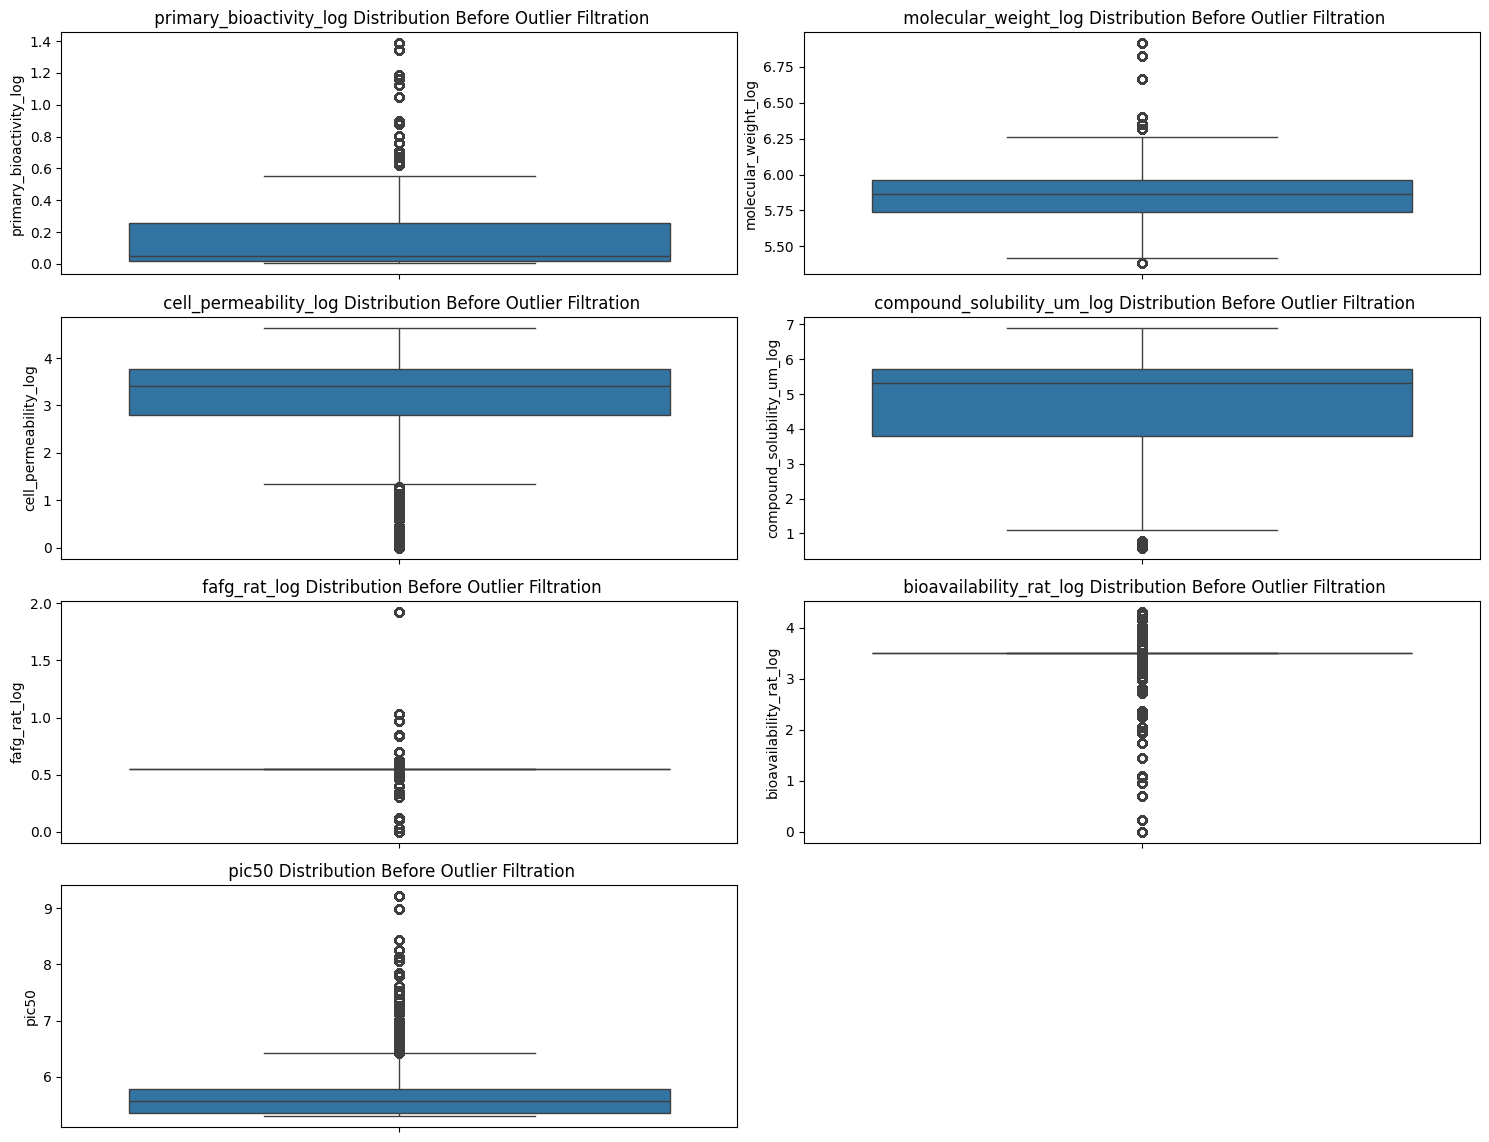

In [21]:
selected_columns = [
    'primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log', 'pic50'
]

plt.figure(figsize=(15, 20))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(cleaned_merged_data[column])
    plt.title(f' {column} Distribution Before Outlier Filtration')

plt.tight_layout()
plt.show()

In [22]:

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to clean
selected_columns = [
    'primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log', 'pic50'
]

# Remove outliers for each numerical column
for column in selected_columns:
    cleaned_merged_data = remove_outliers_iqr(cleaned_merged_data, column)

# Check the data after removing outliers
print(cleaned_merged_data.describe())


              pic50          tpsa         clogp          logd  \
count  1.700416e+06  1.700416e+06  1.700416e+06  1.700416e+06   
mean   5.486729e+00  6.427780e+01  1.706565e+00  1.435695e+00   
std    2.045817e-01  1.737844e+01  7.510792e-01  1.014081e+00   
min    5.300000e+00  3.309000e+01 -5.810000e-01 -2.028800e+00   
25%    5.348000e+00  5.521000e+01  1.267000e+00  9.151000e-01   
50%    5.350000e+00  5.801000e+01  1.693000e+00  1.563000e+00   
75%    5.570000e+00  6.810000e+01  2.137000e+00  2.066700e+00   
max    6.250000e+00  1.335500e+02  4.565000e+00  3.991700e+00   

       num_hydrogen_donors  num_hydrogen_acceptors  num_aromatic_rings  \
count         1.700416e+06            1.700416e+06        1.700416e+06   
mean          1.208147e+00            5.641133e+00        2.964799e+00   
std           6.423478e-01            1.185503e+00        5.373208e-01   
min           0.000000e+00            3.000000e+00        1.000000e+00   
25%           1.000000e+00            5.0000

**Visualizing The Variables After Outliers Filtration**

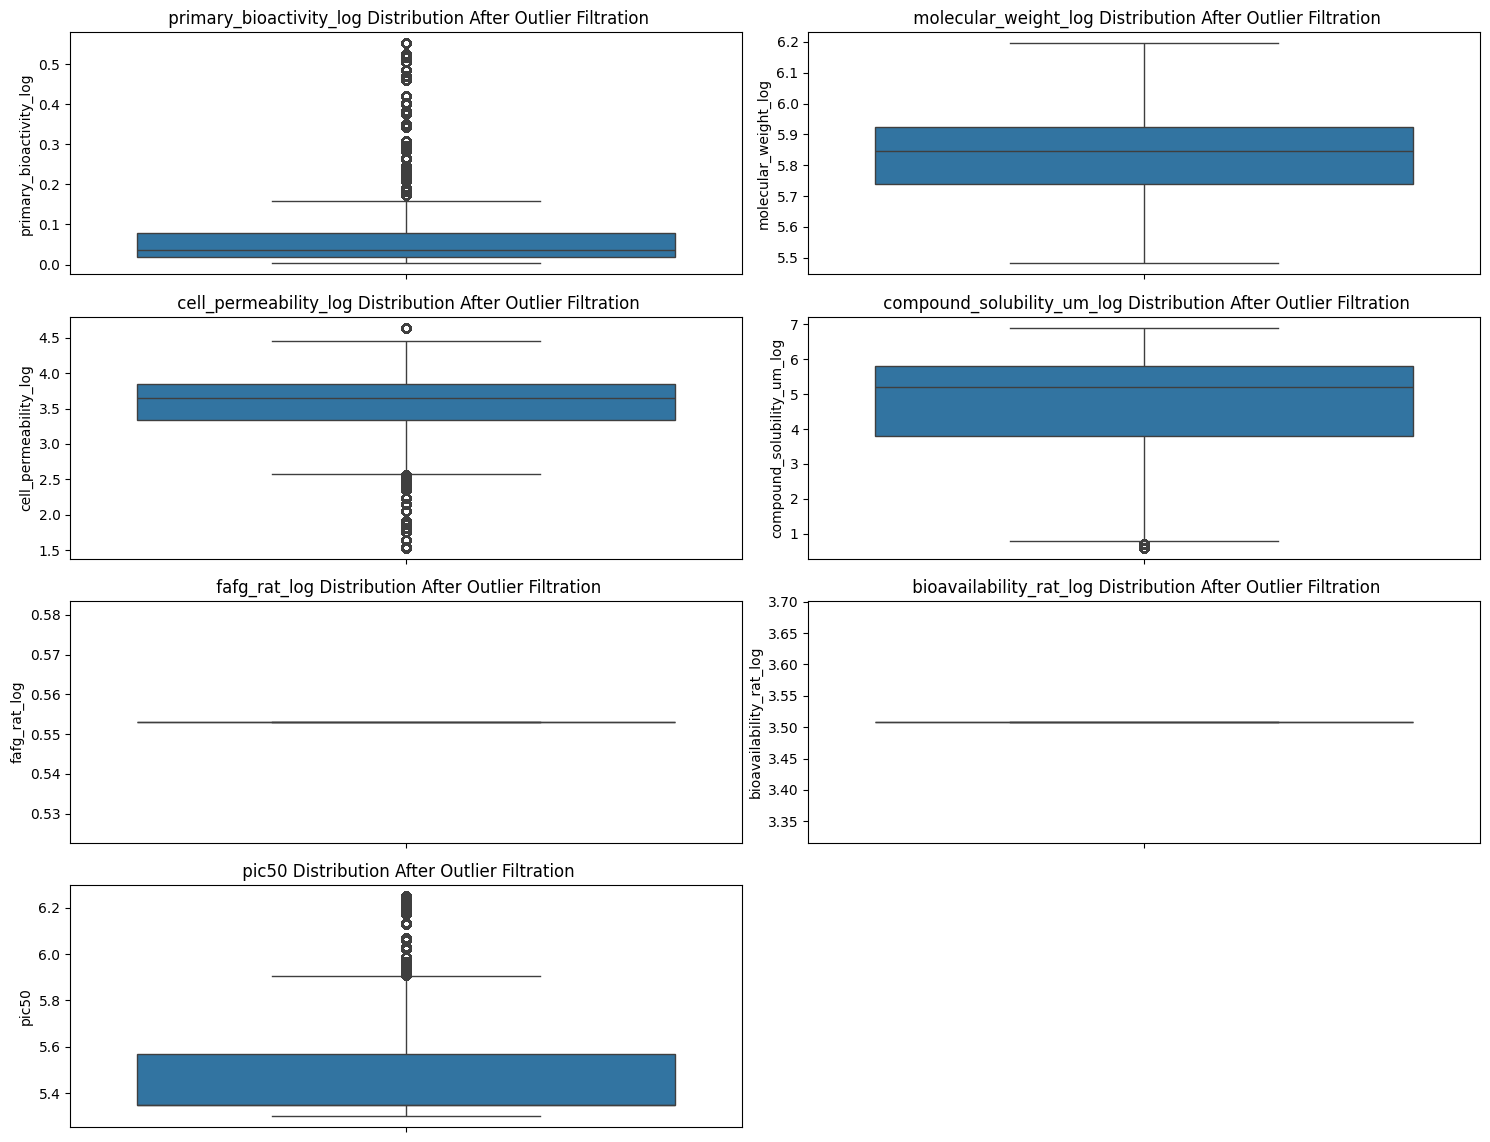

In [23]:
selected_columns = [
    'primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log', 'pic50'
]

plt.figure(figsize=(15, 20))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(cleaned_merged_data[column])
    plt.title(f' {column} Distribution After Outlier Filtration')

plt.tight_layout()
plt.show()

In [25]:
#Checking for Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(cleaned_merged_data[[
    'pic50','primary_bioactivity_log', 'molecular_weight_log',
    'cell_permeability_log', 'compound_solubility_um_log', 'fafg_rat_log',
    'bioavailability_rat_log'
]])


For the feature pic50, No of Outliers is 97872
For the feature primary_bioactivity_log, No of Outliers is 226448
For the feature molecular_weight_log, No of Outliers is 0
For the feature cell_permeability_log, No of Outliers is 152080
For the feature compound_solubility_um_log, No of Outliers is 17360
For the feature fafg_rat_log, No of Outliers is 0
For the feature bioavailability_rat_log, No of Outliers is 0


In [24]:
processed_dataset = cleaned_merged_data.to_parquet('processed_dataset.parquet', index=None)

# EXPLORATORY DATA ANALYSIS

**Exploring relationships between:**

*   Physicochemical properties and bioavailability/clearance.
*   Primary potency and selectivity (off-target bioactivity).
*   Selectivity and adverse events.
*   In vitro to in vivo properties.
*   Data relationships for absorption (FAFG_Rat).


**Overview of the Dataset**

**Variables:**

*   GeneSymbol: Target Gene symbol
*   Ensembl ID: Ensemble gene ID
*   EntrezGene: Entrez gene ID
*   Adverse_Event: Adverse event
*   Adverse_Event_Category: Adverse event categories
*   Adverse_Event_Category_Encoded: Adverse event categories encoded
*   Drugs_with_Adverse_Event: Number of drugs associated with the adverse event
*   Bioactive_drugs: Number of bioactive drugs
*   CompoundID: Compound identifier
*   pIC50: Logarithmic measure of the concentration of a drug required to inhibit a particular biological or biochemical process by 50%.
*   Primary_Bioactivity_Log:  log of bioactivity of the primary target assay
*   Molecular_Weight_Log: Log of molecular weight
*   TPSA: Log of Topological polar surface area
*   ClogP_Log: Log of Calculated partition coefficient
*   LogD: Log of the distribution coefficient
*   Num_H_Donors_Log: Log of Number of hydrogen donors
*   Num_H_Acceptors_Log: Log of Number of hydrogen acceptors
*   Num_AromaticRings_Log:  Log of Number of aromatic rings
*   F_SP3_Log: Log of Fraction of sp3 hybridized carbons
*   Drug_Class: Drug class
*   Cell Permeability_Log: Log of Cell permeability
*   Cmpd Solubility (uM)_ Log: Log of Compound solubility
*   Fafg (Rat)_Log: Log of Fraction absorbed in the gastrointestinal tract (rat)
*   Bioavailability (Rat)_Log: Log of Bioavailability in rats
*   Clint,mic (L/hr/kg) (Rat)_Log: Log of Intrinsic clearance in rats


In [26]:
cleaned_merged_data.shape

(1700416, 25)

In [27]:
# Determining Compound distribution
cleaned_merged_data['compoundid'].value_counts()


compoundid
CM-1771635    15552
CM-1413612    13472
CM-2006735    13472
CM-1398629    11664
CM-1116691     7776
              ...  
CM-1338813     2848
CM-1339532     2848
CM-1339640     2848
CM-1341539     2848
CM-2166641     2848
Name: count, Length: 317, dtype: int64

In [28]:
# Determining Target Gene distribution
cleaned_merged_data['gene_symbol'].value_counts()

gene_symbol
EGFR      1065312
PDGFRB     635104
Name: count, dtype: int64

In [29]:
# Determining Adverse Events Categories distribution
cleaned_merged_data['adverse_events_category'].value_counts()

adverse_events_category
Other               1242886
Haematological        97814
Dermatological        60214
Cardiovascular        45068
Respiratory           34561
General               34274
Musculoskeletal       34064
Gastrointestinal      29132
Renal                 24831
Psychological         21282
Hepatology            17376
Neurological          15713
Immunological         13005
Endocrine             12973
Urology               11329
Reproductive           5894
Name: count, dtype: int64

In [30]:
# Determining Adverse Events Categories distribution
cleaned_merged_data['adverse_events_category_encoded'].value_counts()

adverse_events_category_encoded
10    1242886
5       97814
1       60214
0       45068
14      34561
4       34274
8       34064
3       29132
12      24831
11      21282
6       17376
9       15713
7       13005
2       12973
15      11329
13       5894
Name: count, dtype: int64

In [34]:
# Determining Bioavailability distribution
cleaned_merged_data['bioavailability_rat_log'].value_counts()

bioavailability_rat_log
3.508453    1700416
Name: count, dtype: int64

In [37]:
# Determining Log of Fraction Absorbed distribution
cleaned_merged_data['fafg_rat_log'].value_counts()

fafg_rat_log
0.553091    1700416
Name: count, dtype: int64

In [35]:
# Determining Clearance distribution
cleaned_merged_data['clint_rat_l_hr_kg_log'].value_counts()

clint_rat_l_hr_kg_log
1.252763    234496
3.045285    156240
2.923162     17360
2.815409     17360
2.687847     16320
             ...  
2.186051      2848
2.791165      2848
1.719189      2848
2.397895      2848
3.701302      2848
Name: count, Length: 209, dtype: int64

In [31]:
cleaned_merged_data.head()

,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,primary_bioactivity_log,cell_permeability_log,compound_solubility_um_log,fafg_rat_log,bioavailability_rat_log,clint_rat_l_hr_kg_log,molecular_weight_log,adverse_events_category,adverse_events_category_encoded
1496736,CM-370560,EGFR,5.35,62.75,3.254,3.2544,1,5,5.0,0.16667,...,21,0.552159,3.405307,5.348926,0.553091,3.508453,3.045285,5.93867,Haematological,5
1496737,CM-370560,EGFR,5.35,62.75,3.254,3.2544,1,5,5.0,0.16667,...,21,0.552159,3.405307,5.348926,0.553091,3.508453,3.045285,5.93867,Gastrointestinal,3
1496738,CM-370560,EGFR,5.35,62.75,3.254,3.2544,1,5,5.0,0.16667,...,151,0.552159,3.405307,5.348926,0.553091,3.508453,3.045285,5.93867,Gastrointestinal,3
1496739,CM-370560,EGFR,5.35,62.75,3.254,3.2544,1,5,5.0,0.16667,...,21,0.552159,3.405307,5.348926,0.553091,3.508453,3.045285,5.93867,Other,10
1496740,CM-370560,EGFR,5.35,62.75,3.254,3.2544,1,5,5.0,0.16667,...,8,0.552159,3.405307,5.348926,0.553091,3.508453,3.045285,5.93867,Psychological,11


# DATA ANALYSIS AND VISUALIZATION

**Relationship Between Physicochemical Properties vs Clearance**

Physicochemical properties column: molecular_weight_Log

Clearance column: clint_rat_l_hr_kg_log

**Correlation Matrix**

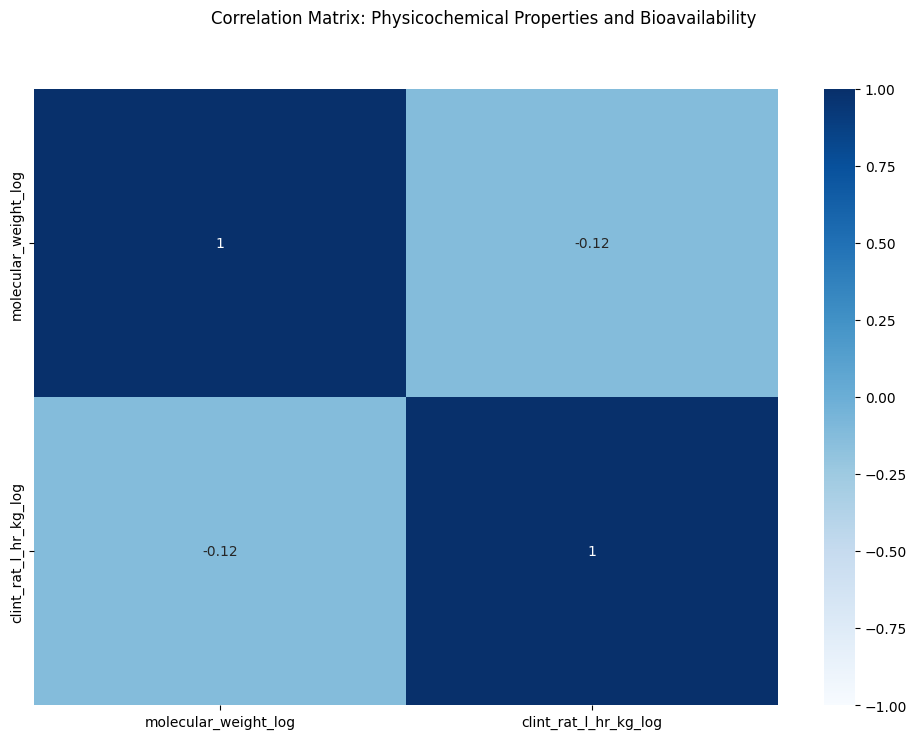

In [36]:
# Selecting relevant columns

selected_columns = [
    'molecular_weight_log', 'clint_rat_l_hr_kg_log'
]

data_physico_bio = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_physico_bio.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.suptitle('Correlation Matrix: Physicochemical Properties and Clearance')
plt.show()



**Scatter Plots: Physicochemical Properties vs Bioavailability**

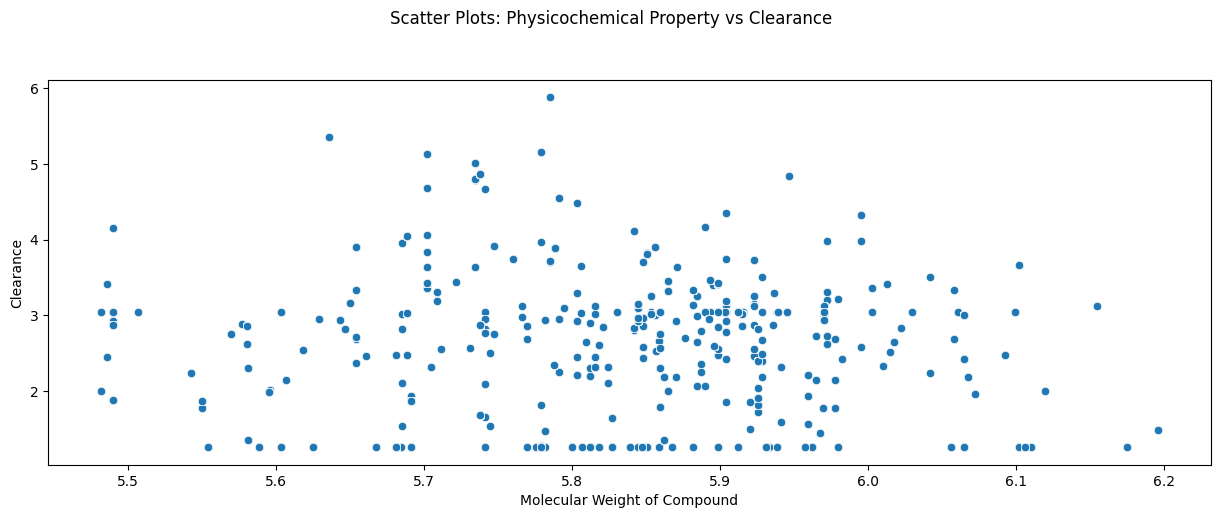

In [38]:
# Scatter plot of selected physicochemical properties vs clearance
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data_physico_bio['molecular_weight_log'], y=data_physico_bio['clint_rat_l_hr_kg_log'])
plt.suptitle('Scatter Plots: Physicochemical Property vs Clearance', y=1.02)
plt.xlabel('Molecular Weight of Compound')
plt.ylabel('Clearance')
plt.show()



**Relationship Between Primary Potency and Selectivity (Off-Target Bioactivity)**

Primary Potency: Primary_BioActivity_Log

Selectivity (off-target bioactivity): pIC50

**Correlation Matrix**

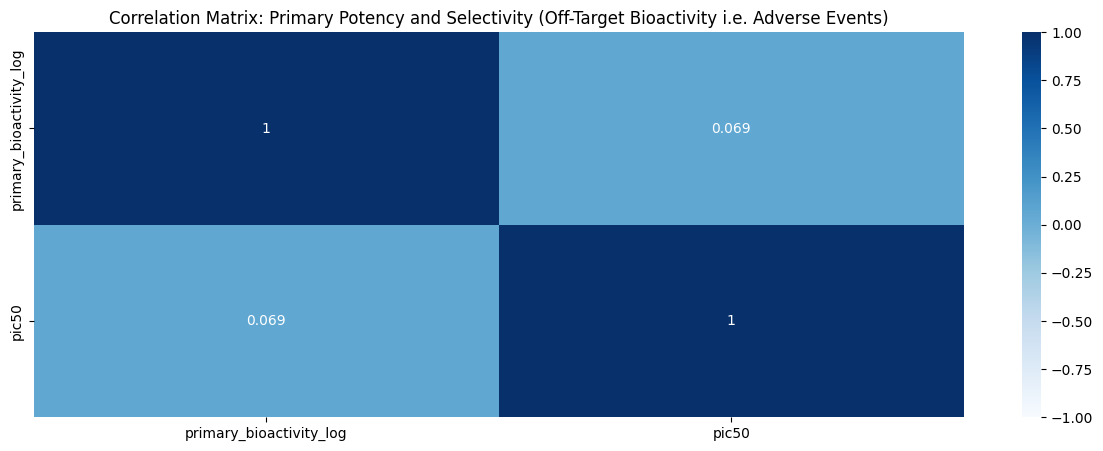

In [39]:

# Selecting relevant columns
columns = ['primary_bioactivity_log', 'pic50']
data_pry_pot_off = cleaned_merged_data[columns]

# Calculate the correlation matrix
correlation_matrix = data_pry_pot_off.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Primary Potency and Selectivity (Off-Target Bioactivity i.e. Adverse Events)')
plt.show()


**Scatter Plots: Primary Potency and Selectivity (Off-Target Bioactivity)**

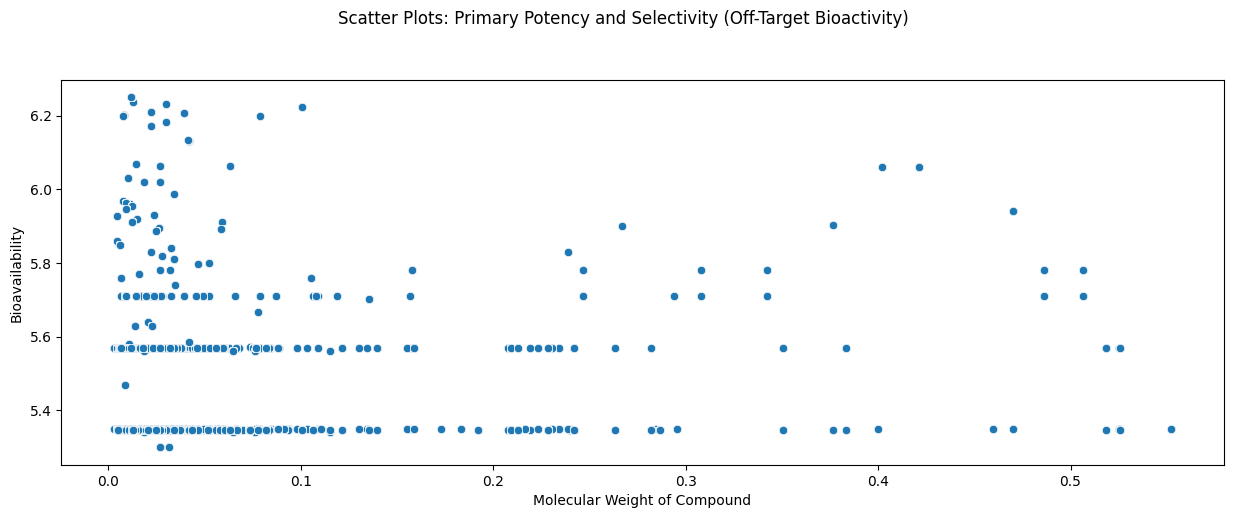

In [41]:
# Scatter plot of selected Primary Potency and Selectivity (Off-Target Bioactivity)
plt.figure(figsize=(15, 5))
sns.scatterplot(x=cleaned_merged_data['primary_bioactivity_log'], y=cleaned_merged_data['pic50'])
plt.suptitle('Scatter Plots: Primary Potency and Selectivity (Off-Target Bioactivity)', y=1.02)
plt.xlabel('Molecular Weight of Compound')
plt.ylabel('Selectivity (Off-Target Bioactivity)')
plt.show()



**Relationship Between Selectivity and Adverse Events**

Selectivity (off-target bioactivity): pIC50

Adverse Events: Adverse Events Category Encoded, Adverse Event Categories

**Correlation Matrix**

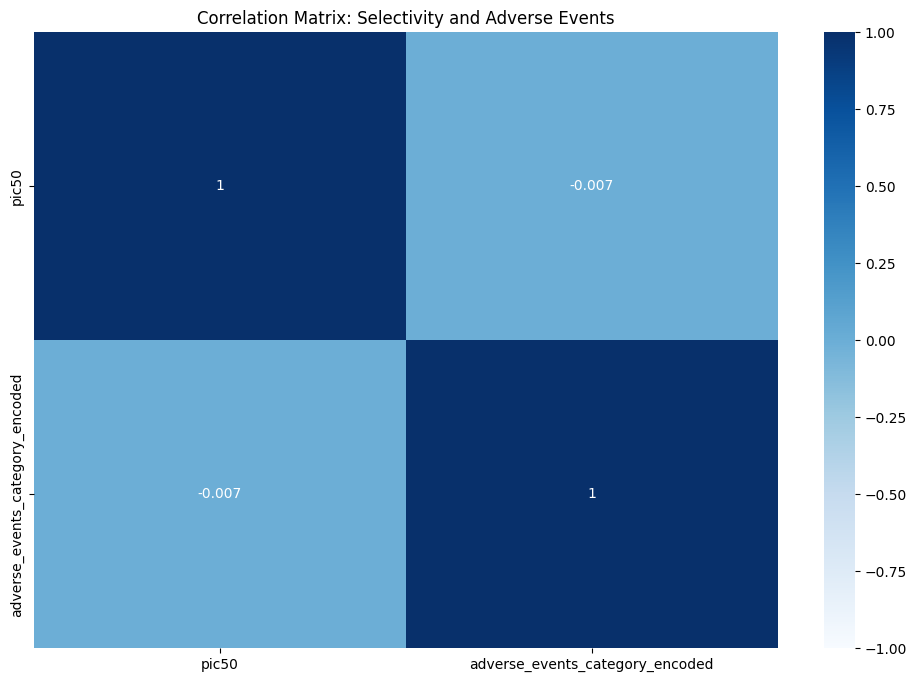

In [42]:
# Selecting relevant columns
columns = ['pic50', 'adverse_events_category_encoded']
data_pry_pot_off = cleaned_merged_data[columns]


# Selecting relevant columns
selected_columns = ['pic50', 'adverse_events_category_encoded']
numeric_data = data_pry_pot_off[selected_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Selectivity and Adverse Events')
plt.show()


**Scatter Plot: Selectivity and Adverse Events**

In [48]:
# Scatter plot of Selectivity and Adverse Events
plt.figure(figsize=(15, 10))
sns.scatterplot(x=cleaned_merged_data['adverse_events_category'], y=cleaned_merged_data['pic50'])
# plt.bar(x=cleaned_merged_data['adverse_events_category_encoded'], height=cleaned_merged_data['pic50'], color ='blue', width = 0.4)
plt.xticks(rotation='vertical')
plt.suptitle('Scatter Plots: Selectivity and Adverse Events', y=1.02)
plt.xlabel('Category of Adverse Events')
plt.ylabel('Negative Logarithm of the Half-maximal inhibitory concentration')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7bc061f08310> (for post_execute):


KeyboardInterrupt: 

**Relationship Between In Vitro and In Vivo Properties**

In Vitro Properties: Primary_BioActivity_Log

In Vivo Properties: clint_rat_l_hr_kg_log

**Correlation Matrix**

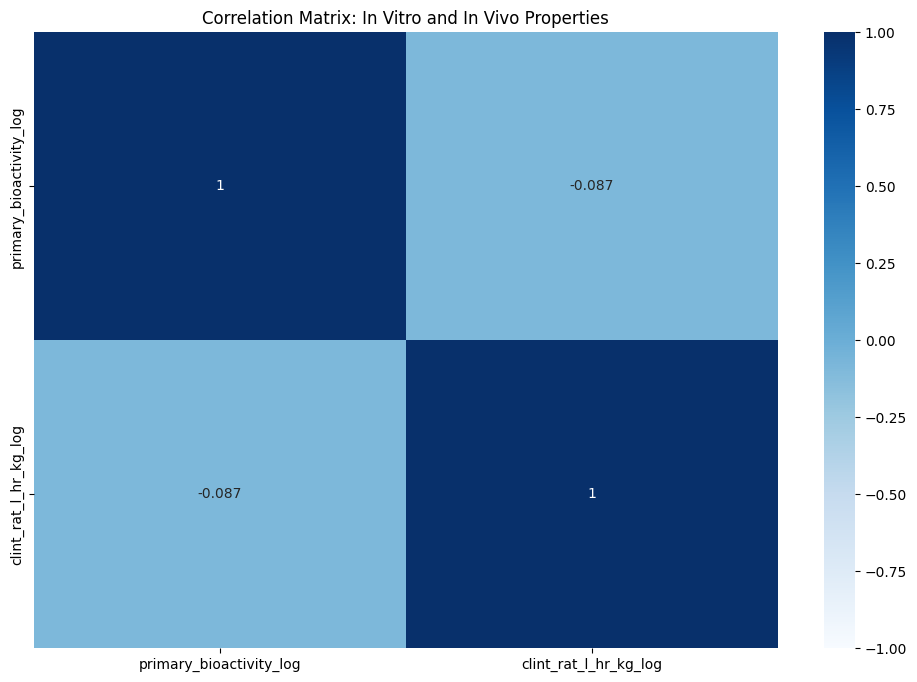

In [49]:
# Selecting relevant columns

selected_columns = ['primary_bioactivity_log', 'clint_rat_l_hr_kg_log']
data_vivo_vitro = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_vivo_vitro.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: In Vitro and In Vivo Properties')
plt.show()



Scatter Plots: In Vitro and In Vivo Properties

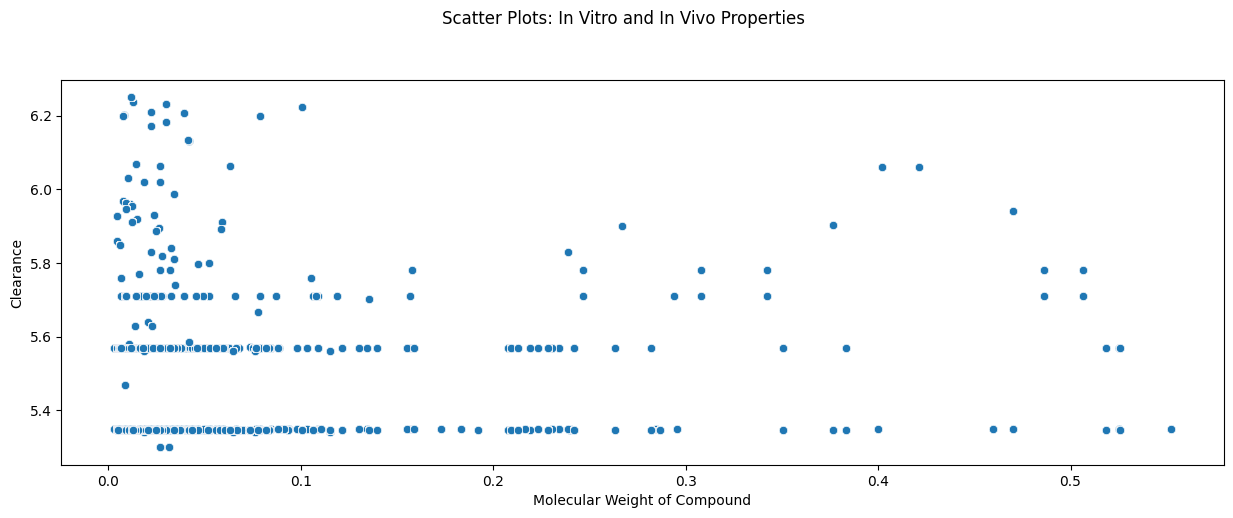

In [50]:
# Scatter plot of In Vitro and In Vivo Properties
plt.figure(figsize=(15, 5))
sns.scatterplot(x=cleaned_merged_data['primary_bioactivity_log'], y=cleaned_merged_data['pic50'])
plt.suptitle('Scatter Plots: In Vitro and In Vivo Properties', y=1.02)
plt.xlabel('Molecular Weight of Compound')
plt.ylabel('Clearance')
plt.show()



**Data Relationships for Absorption (fafg_rat)**

Given that the cell permeability, compound solubility and molecular weight of the drug affect absorption which in turn affects the clearance of the drug molecules, all these relationships will be explored.


Physicochemical properties: Molecular_Weight_Log

Cleareance: clint_rat_l_hr_kg_log

Cell Permeability : Cell_Permeability_Log

Compound Solubility: Compound_Solubility_uM_Log

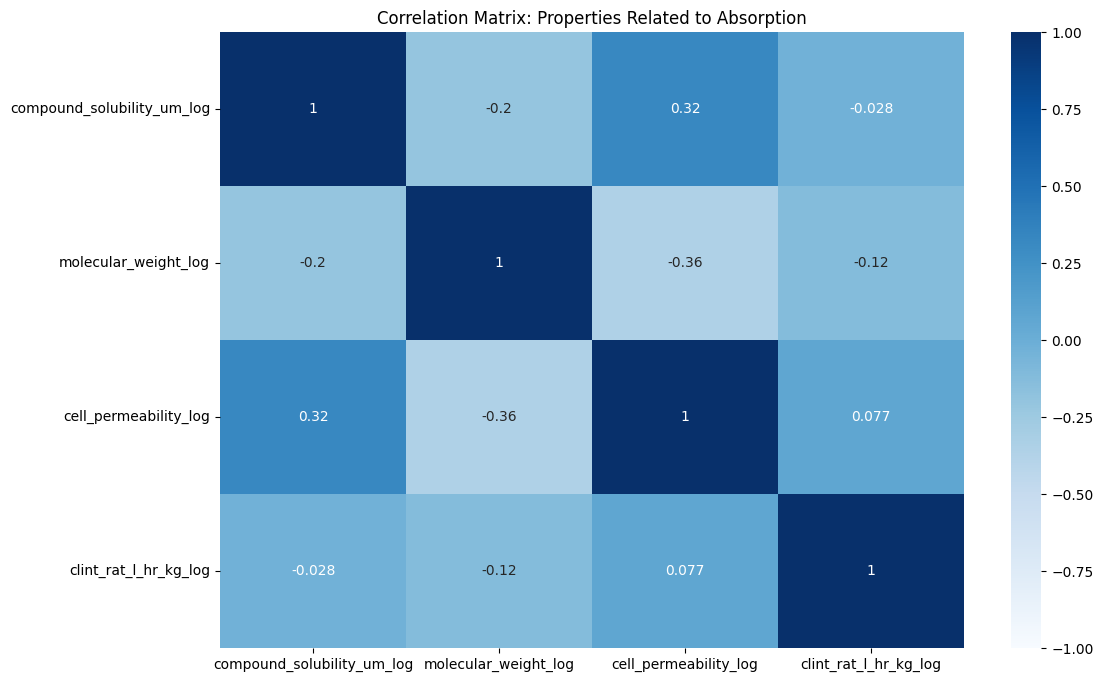

In [55]:
# Selecting relevant columns

selected_columns = ['compound_solubility_um_log', 'molecular_weight_log', 'cell_permeability_log', 'clint_rat_l_hr_kg_log']
data_absorption = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_absorption.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Properties Related to Absorption')
plt.show()



**Plot of Data Relationships for Absorption (fafg_rat)**

In [59]:
from bokeh.layouts import row
from bokeh.plotting import figure, show

# create a new bokeh plot
plt_absorption = figure()

# add a line renderer and legend to the plot
plt_absorption.line(x=cleaned_merged_data['compound_solubility_um_log'], y=cleaned_merged_data['cell_permeability_log'], legend_label="Absorption")

# show the results
show(plt_absorption)

**Layout of Data Relationships for Absorption (fafg_rat)**

In [ ]:
# create four plots with one renderer each
l1 = figure(width=250, height=250, background_fill_color="#fafafa")
l1.scatter(x=cleaned_merged_data['fafg_rat_log'], y=cleaned_merged_data['bioavailability_rat_log'], size=12, color="#1555d5", alpha=0.8, marker="circle")

l2 = figure(width=250, height=250, background_fill_color="#fafafa")
l2.scatter(x=cleaned_merged_data['fafg_rat_log'], y=cleaned_merged_data['cell_permeability_log'], size=12, color="#0e398f", alpha=0.8, marker="triangle")

l3 = figure(width=250, height=250, background_fill_color="#fafafa")
l3.scatter(x=cleaned_merged_data['fafg_rat_log'], y=cleaned_merged_data['molecular_weight_log'], size=12, color="#071D49", alpha=0.8, marker="circle")

l4 = figure(width=250, height=250, background_fill_color="#fafafa")
l4.scatter(x=cleaned_merged_data['fafg_rat_log'], y=cleaned_merged_data['compound_solubility_um_log'], size=12, color="#4980ed", alpha=0.8, marker="triangle")

# put the results in a row and show
show(row(l1, l2, l3, l4))



 **Relationships Between the Compounds and their Absorption rate, Safety, and Efficacy, Molecular Targets**

Compound: Compound_ID

Safety: Adverse Events Category Encoded

Absorption rate: Molecular_Weight_Log, Fafg_Log,

Efficacy: pIC50

Molecular Targets: Gene_Target

**Layout of the Relationships Between the Compounds and their Absorption rate, Safety, and Efficacy, Molecular Targets**

In [64]:
# create four plots with one renderer each
s1 = figure(width=250, height=250, background_fill_color="#fafafa")
s1.scatter(x=cleaned_merged_data['compoundid'], y=cleaned_merged_data['pic50'], size=12, color="#1555d5", alpha=0.8, marker="circle")

s2 = figure(width=250, height=250, background_fill_color="#fafafa")
s2.scatter(x=cleaned_merged_data['compoundid'], y=cleaned_merged_data['adverse_events_category_encoded'], size=12, color="#0e398f", alpha=0.8, marker="triangle")

s3 = figure(width=250, height=250, background_fill_color="#fafafa")
s3.scatter(x=cleaned_merged_data['compoundid'], y=cleaned_merged_data['gene_symbol'], size=12, color="#4980ed", alpha=0.8, marker="square")

s4 = figure(width=250, height=250, background_fill_color="#fafafa")
s4.scatter(x=cleaned_merged_data['compoundid'], y=cleaned_merged_data['molecular_weight_log'], size=12, color="#071D49", alpha=0.8, marker="circle")

s5 = figure(width=250, height=250, background_fill_color="#fafafa")
s5.scatter(x=cleaned_merged_data['compoundid'], y=cleaned_merged_data['compound_solubility_um_log'], size=12, color="#4980ed", alpha=0.8, marker="triangle")

# put the results in a row and show
show(row(s1, s2, s3, s4, s5))

